# White Paper Plots
Notebook to make plots for the white paper to Jay Hnilo.
Feb 2024, Jimmy Butler

In [1]:
# load packages
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(tidyverse)
library(data.table)
library(gridExtra)
library(knitr)
library(ggExtra)
library(ggpubr)
library(extRemes)
library(latex2exp)
library(cowplot)

# load perlmutter scratch filepath signature
perlpath <- Sys.getenv('PSCRATCH')

# load self-made functions
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/auxiliary_scripts/projection.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/utils.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/confidenceRegions.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/auxiliary_scripts/orig_isolines.R')

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_c

### Figure 1

A figure showcasing both asymptotically independent and asymptotically dependent datasets, along with their marginal distributions, and some notion of the compoundedness of the extremes.

In [2]:
# uploading AI and AD datasets from Cooley et al. (2019)
load('~/isolines_uq/data/cooley_data/karachiDatDaily.Rdata')
karachi_data <- karachiDatDaily[,c(3,4)]
colnames(karachi_data) <- c('X1', 'X2')
load('~/isolines_uq/data/cooley_data/santaAnaBivariate.Rdata')
santa_ana_data <- saDat[,c(4,5)]
colnames(santa_ana_data) <- c('X1', 'X2')

In [3]:
ignition_dates = saDat %>% filter(date == '10/21/07' | date == '11/15/08' | date == '10/25/03')
heat_wave_dates = karachiDatDaily %>% filter(date >= '06/20/15', date <= '06/25/15')

In [9]:
lbs <- c(0, -100)
ubs <- c(15, 0)

p <- 0.05
qs <- c(0.005, 0.001, 0.0005)

# using original function from Cooley (2019)
res <- xContours(dat=santa_ana_data, baseContourLevel=p, projContourLevels=qs, gridSize=100)
q_isolines_SA <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [10]:
pltSA <- ggplot() + geom_point(data=santa_ana_data, aes(x = X1, y = X2), alpha=0.2) + 
xlab('Windspeed (m/s)') + ylab('Negative Relative Humidity (-%)') + 
#geom_line(data=data.frame(q_isolines_SA[[1]]), aes(x = X1, y = X2, color = '0.005-isoline'), size=1) +
#geom_line(data=data.frame(q_isolines_SA[[2]]), aes(x = X1, y = X2, color = '0.001-isoline'), size=1) +
#geom_line(data=data.frame(q_isolines_SA[[3]]), aes(x = X1, y = X2, color = '0.0005-isoline'), size=1) +
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=F) +
theme_light() + 
ggtitle('Santa Ana Wildfire Risk, CA') + 
theme(legend.position = c(0.75, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltSA_margins <- ggMarginal(pltSA, type='histogram')

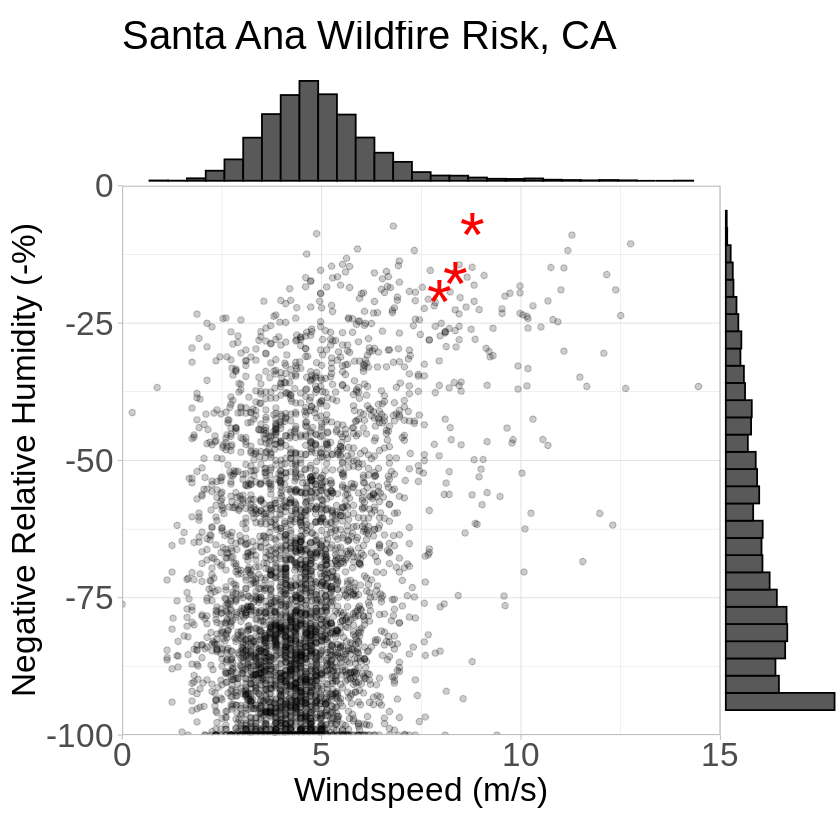

In [11]:
pltSA_margins$vp = grid::viewport(height=0.95, width=1)
pltSA_margins

In [12]:
lbs <- c(50, 0)
ubs <- c(140, 100)

p <- 0.01
qs <- c(0.005, 0.001, 0.0005)

# using original function from Cooley (2019)
res <- xContours(dat=karachi_data, baseContourLevel=p, projContourLevels=qs, asympIndep=TRUE, gridSize=100)
q_isolines_K <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

In [13]:
pltKa <- ggplot() + geom_point(data=karachi_data, aes(x = X1, y = X2), alpha=0.1) + 
#geom_line(data=data.frame(q_isolines_K[[1]]), aes(x = X1, y = X2, color = '0.005-isoline'), size=1) +
#geom_line(data=data.frame(q_isolines_K[[2]]), aes(x = X1, y = X2, color = '0.001-isoline'), size=1) +
#geom_line(data=data.frame(q_isolines_K[[3]]), aes(x = X1, y = X2, color = '0.0005-isoline'), size=1) +
geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red', size=13, shape='*') +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + theme_light() +
ggtitle('Heat Wave Risk, Karachi') + 
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115)) +
theme(legend.position = c(0.75, 0.87), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=15),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"))
pltKa_margins <- ggMarginal(pltKa, type='histogram')

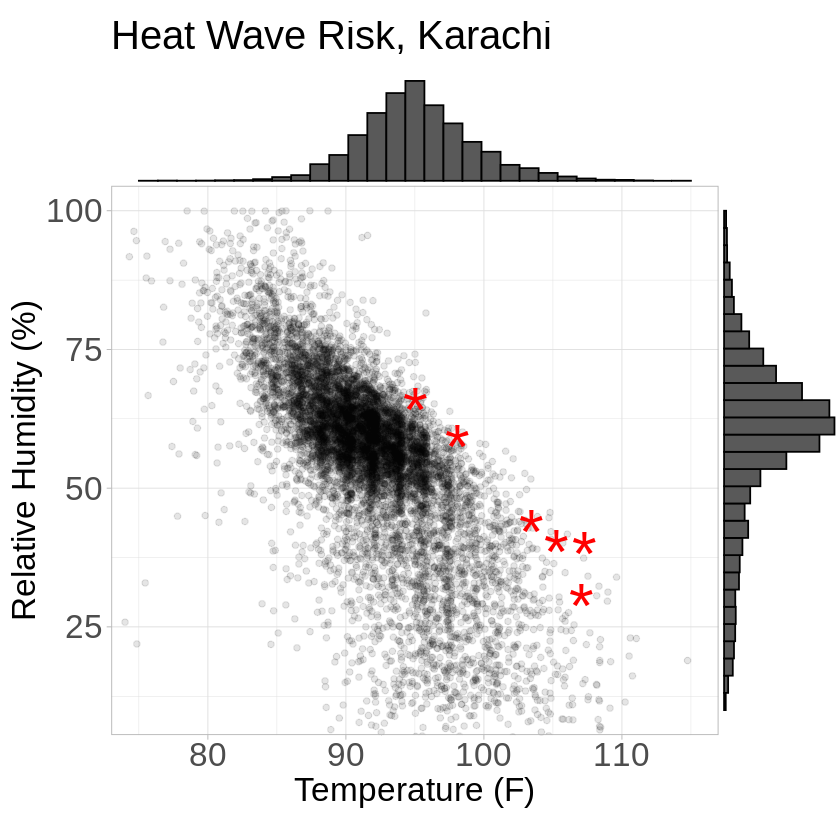

In [14]:
pltKa_margins$vp = grid::viewport(height=0.95, width=1)
pltKa_margins

In [15]:
u = c(seq(0.5, 0.9, by = 0.05), seq(0.91, 0.99, by = 0.01))

SAchi = rep(NA, length(u))
KAchi = rep(NA, length(u))

for(i in 1:length(u)){
  SAchi[i] = taildep(santa_ana_data$X1, santa_ana_data$X2, u[i])[1]
  KAchi[i] = taildep(karachi_data$X1, karachi_data$X2, u[i])[1]
}

SAchidf <- data.frame(u=u, SAchi=SAchi)
KAchidf <- data.frame(u=u, KAchi=KAchi)

In [16]:
pltSA_chi = ggplot(SAchidf, aes(x = u, y = SAchi)) +
  geom_line() +
  ylim(c(0,1)) +
  xlim(c(0.5, 1)) +
  ylab(TeX("$\\chi$")) +
  theme_light() +
  theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 14), 
      text = element_text(size = 20))

In [17]:
pltKA_chi = ggplot(KAchidf, aes(x = u, y = KAchi)) +
  geom_line() +
  ylim(c(0, 1)) +
  xlim(c(0.5, 1)) +
  ylab(TeX("$\\chi$")) +
  theme_light() +
  theme(axis.title = element_text(size = 20), 
      axis.text = element_text(size = 14), 
      text = element_text(size = 20))

In [18]:
options(repr.plot.width=13, repr.plot.height=8, scipen=999)
p = cowplot::plot_grid(pltSA_margins, pltKa_margins, pltSA_chi, pltKA_chi,
                   ncol = 2,
                   rel_heights = c(2, 1/2))

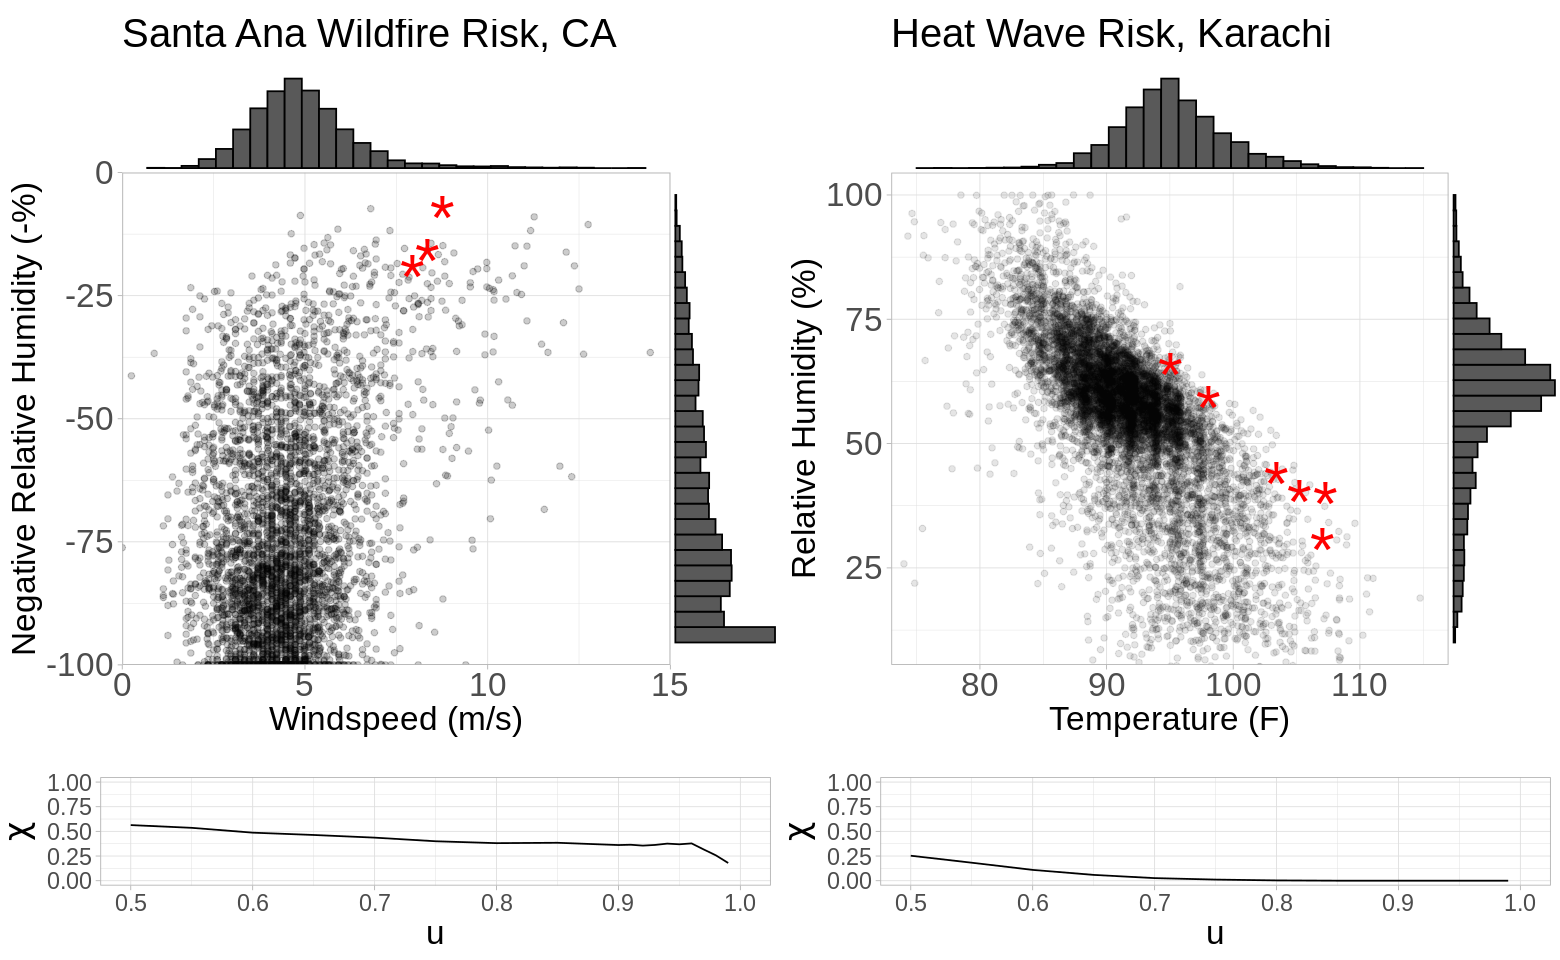

In [19]:
p

In [21]:
ggsave(filename='~/isolines_uq/plots/bivariate_extremes_intro_no_isolines.png', plot=p, device='png', width=13, height=8)

In [44]:
options(repr.plot.width=13, repr.plot.height=7, scipen=999)
p = cowplot::plot_grid(pltSA_margins, pltKa_margins,
                   ncol = 2,
                   rel_heights = c(2, 1/2))

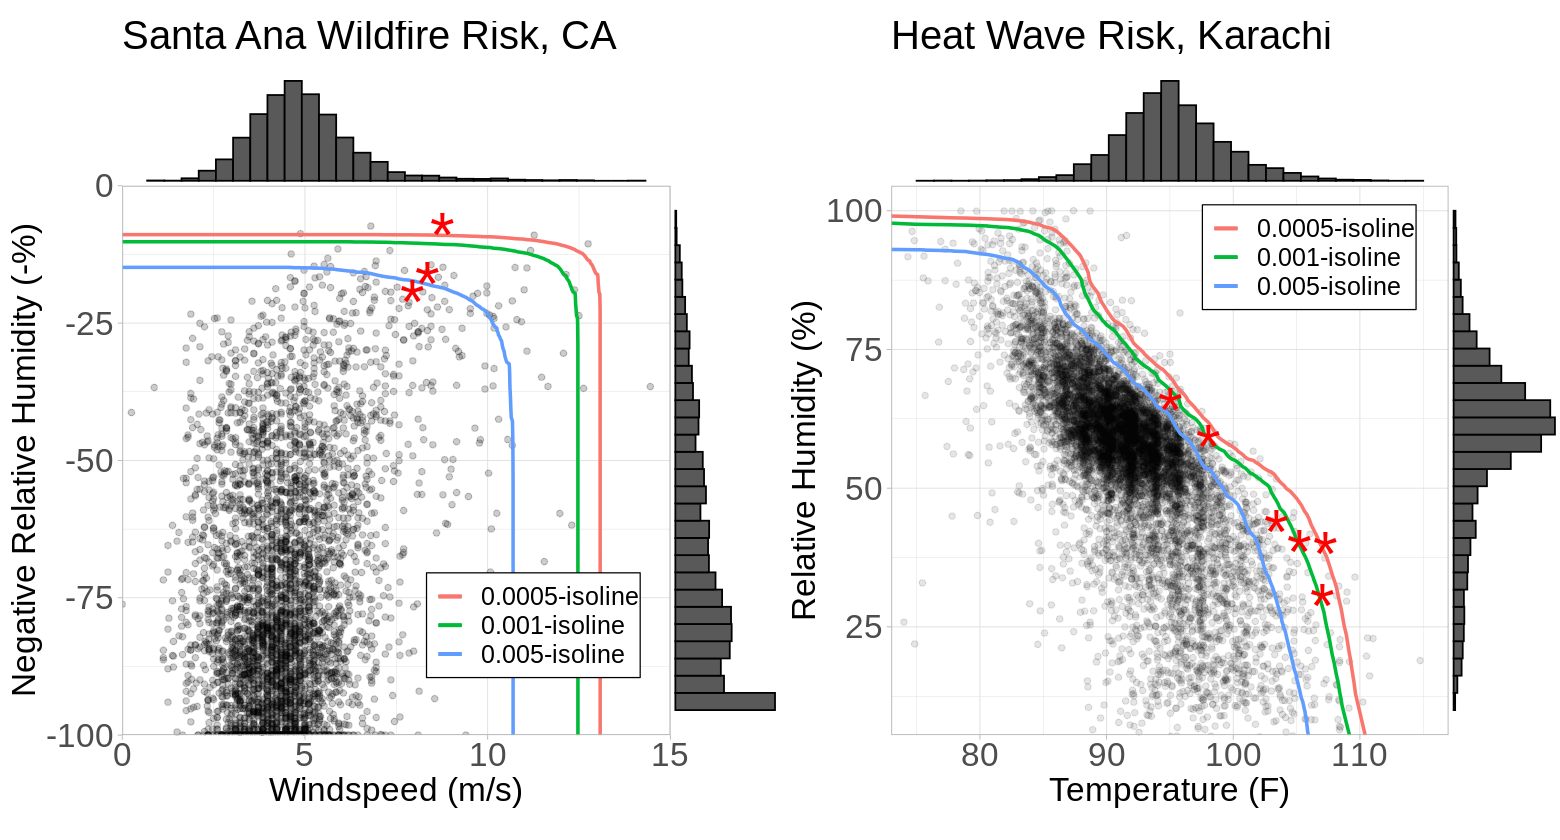

In [45]:
p

In [46]:
ggsave(filename='~/isolines_uq/plots/bivariate_extremes_isolines.png', plot=p, device='png', width=13, height=8)

### Figure 2

A figure showing my confidence tubes, and Cooley's isolines

In [151]:
lbs <- c(0, -100)
ubs <- c(15, 0)
gticks <- 400
grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

p <- 0.01
q <- 0.001

In [152]:
grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

In [153]:
base_out <- drawBaseRegions(santa_ana_data, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)
base_out <- base_out[[1]]

In [154]:
proj_out <- projectBaseRegion(base_out, proj_p=q, asympIndep=FALSE)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [155]:
end_pt_1 <- proj_out[[3]][which.min(proj_out[[3]][,2]),]
end_pt_2 <- proj_out[[4]][which.min(proj_out[[4]][,2]),]
end_pt_3 <- c(end_pt_1[1,1], -100)
end_pt_4 <- c(end_pt_2[1,1], -100)

In [156]:
tube_top <- rbind(proj_out[[3]], end_pt_3)
tube_bottom <- rbind(proj_out[[4]], end_pt_4)

In [157]:
res <- xContours(dat=santa_ana_data, baseContourLevel=p, projContourLevels=c(q), asympIndep=FALSE, gridSize=100)
q_isolines_SA <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [158]:
end_isoline_pt <- q_isolines_SA[[1]]

In [159]:
q_isolines_SA[[1]][which.min(q_isolines_SA[[1]][,2]),]

[1]   12.55672 -100.00000

In [160]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon1 <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

plt_SA_2 <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.001-tube'), alpha=0.2) +
geom_line(data=data.frame(q_isolines_SA[[1]]), aes(x=X1, y=X2, color='0.001-isoline'), size=1) +
geom_point(data=ignition_dates, aes(x = windspeeds, y = neg_relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(-100, 0), xlim = c(0, 15), expand=FALSE) +
xlab('Wind Speed (m/s)') + ylab('Negative Relative Humidity (-%)') + 
ggtitle('Santa Ana Wildfire Risk, CA') +
scale_color_manual(values=c('#F8766D')) +
scale_fill_manual(values=c('#F8766D')) +
theme_light() +
theme(legend.position = c(0.80, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"),
      plot.margin = margin(1,25,1,1))

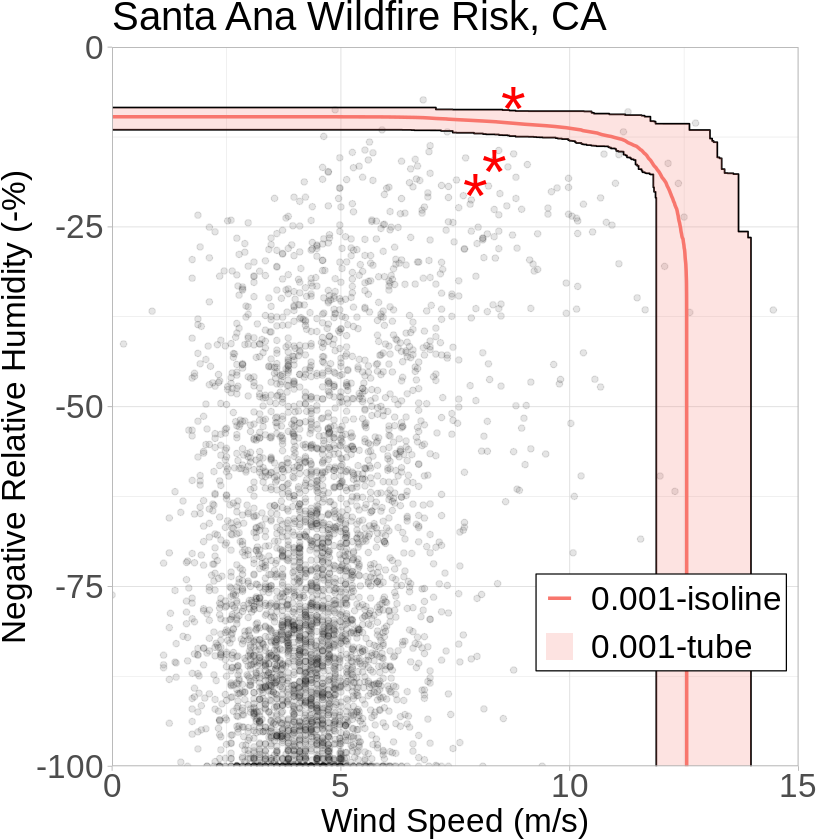

In [161]:
plt_SA_2

In [162]:
lbs <- c(50, 0)
ubs <- c(140, 100)
gticks <- 400 
grid <- expand.grid(X1 = seq(lbs[1], ubs[1], length.out = gticks),
                    X2 = seq(lbs[2], ubs[2], length.out = gticks))

p <- 0.01
q <- 0.001

In [163]:
grid_obj <- list()
grid_obj$lbs <- lbs
grid_obj$ubs <- ubs
grid_obj$grid <- grid

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

In [164]:
base_out <- drawBaseRegions(karachi_data, grid_obj, alphas = c(0.05), ps = c(p), B=500, beta_funcs_dict=beta_funcs_dict)
base_out <- base_out[[1]]

In [165]:
proj_out <- projectBaseRegion(base_out, proj_p=q, asympIndep=TRUE)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

In [166]:
res <- xContours(dat=karachi_data, baseContourLevel=p, projContourLevels=c(q), asympIndep=TRUE, gridSize=100)
q_isolines_K <- res$projContours

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


In [167]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon1 <- rbind(proj_out[[3]], 
                 data.frame(t(rev(data.frame(t(proj_out[[4]]))))))

plt_KA_2 <- ggplot() + geom_point(data=base_out$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=proj_out[[3]], aes(x=X1, y=X2)) +
geom_line(data=proj_out[[4]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.001-tube'), alpha=0.2) +
geom_line(data=data.frame(q_isolines_K[[1]]), aes(x=X1, y=X2, color='0.001-isoline'), size=1) +
geom_point(data=heat_wave_dates, aes(x = temp, y = relHum), color = 'red', size=13, shape='*') +
coord_cartesian(ylim=c(10, 100), xlim = c(75, 115), expand=FALSE) +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle('Heat Wave Risk, Karachi') +
scale_color_manual(values=c('#F8766D')) +
scale_fill_manual(values=c('#F8766D')) +
theme_light() +
theme(legend.position = c(0.80, 0.87), 
      legend.title = element_blank(),  
      axis.title = element_text(size = 20),
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"),
      plot.margin = margin(1,25,1,1))

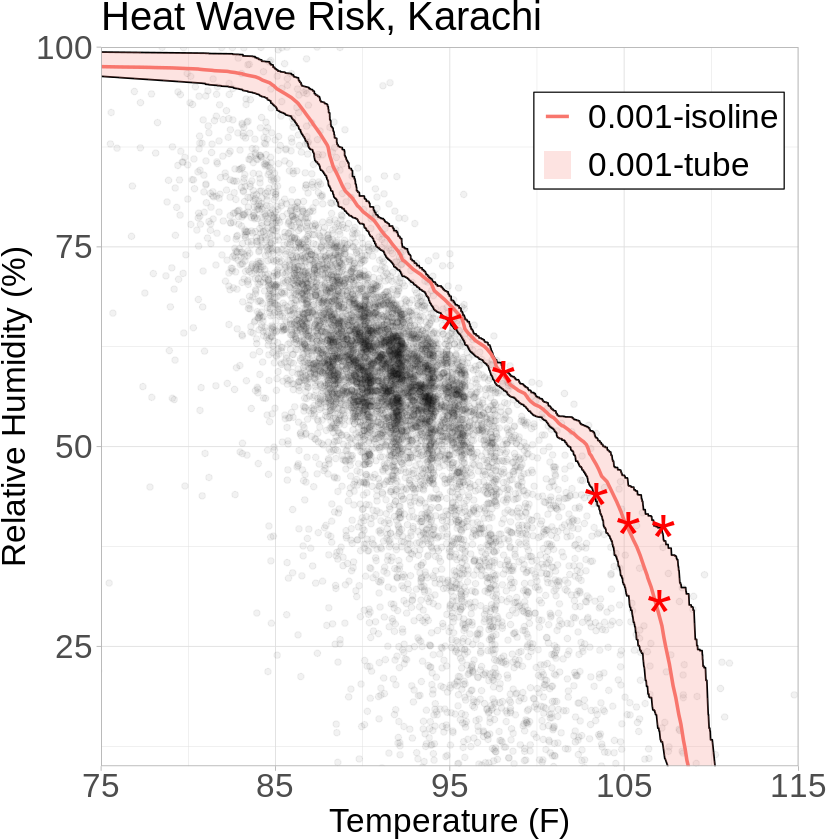

In [168]:
plt_KA_2

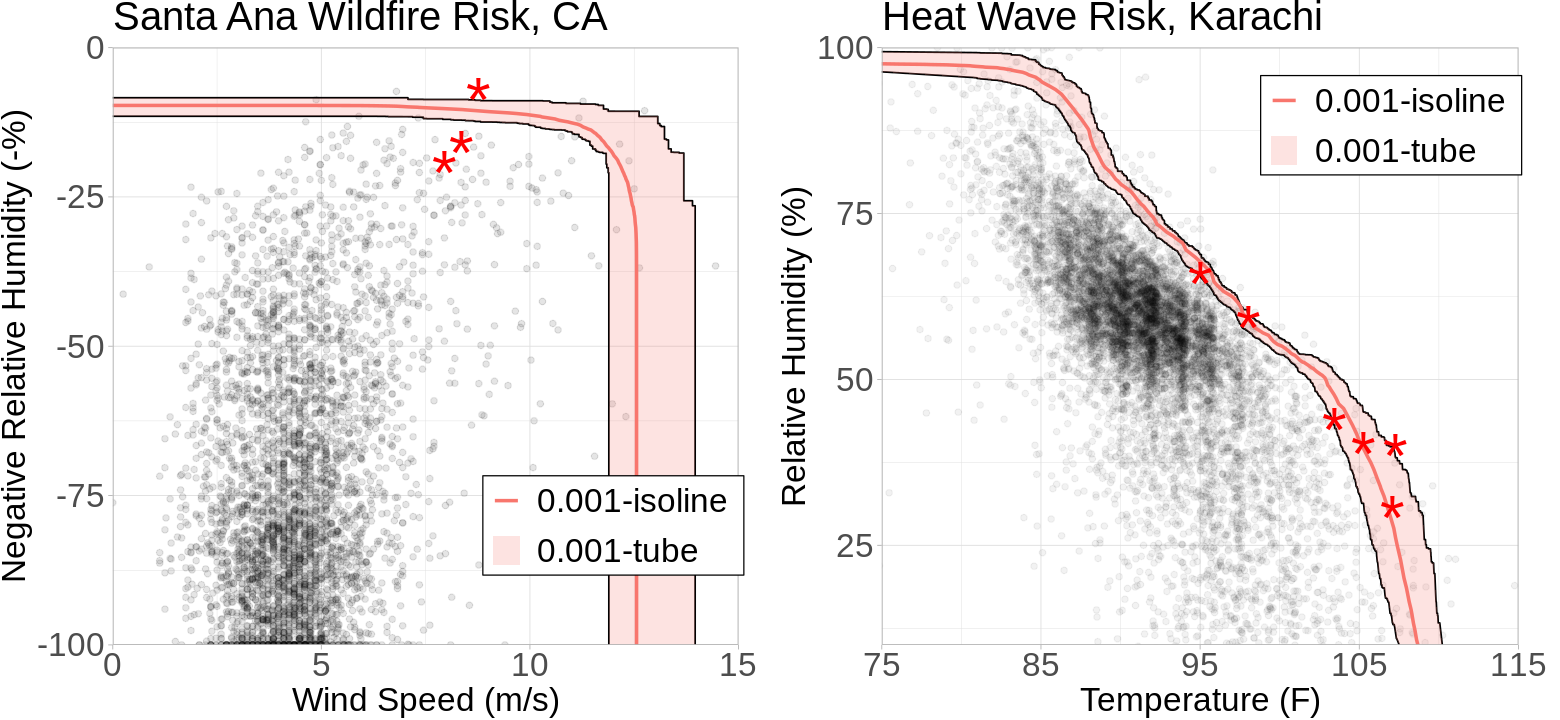

In [169]:
options(repr.plot.width=13, repr.plot.height=6, scipen=999)
p = cowplot::plot_grid(plt_SA_2, plt_KA_2,
                   ncol = 2)
p

In [170]:
ggsave(filename='~/isolines_uq/plots/confidence_tubes_ex.pdf', plot=p, device='png', width=13, height=6)

In [117]:
getwd()

[1] "/global/u1/j/jbbutler/isolines_uq/notebooks/confidence_region_notebooks"